In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as inline
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | grindavik
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | emerald
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | sibu
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | adre
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | abu dhabi
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 |

Processing Record 41 of Set 4 | bad iburg
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | ocos
Processing Record 44 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 4 | qandahar
City not found. Skipping...
Processing Record 46 of Set 4 | zambezi
Processing Record 47 of Set 4 | huarmey
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | tarudant
City not found. Skipping...
Processing Record 1 of Set 5 | sandwich
Processing Record 2 of Set 5 | belmonte
Processing Record 3 of Set 5 | yatou
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | durban
Processing Record 6 of Set 5 | sheridan
Processing Record 7 of Set 5 | pailon
Processing Record 8 of Set 5 | lichuan
Processing Record 9 of Set 5 | nikolskoye
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 | mount gambier
Processing Record 12 of Set 5 | sal

Processing Record 31 of Set 8 | vila
Processing Record 32 of Set 8 | jatiroto
Processing Record 33 of Set 8 | malinyi
Processing Record 34 of Set 8 | college
Processing Record 35 of Set 8 | raga
Processing Record 36 of Set 8 | moerai
Processing Record 37 of Set 8 | kandrian
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 40 of Set 8 | turkan
Processing Record 41 of Set 8 | ojinaga
Processing Record 42 of Set 8 | ribeira brava
Processing Record 43 of Set 8 | saint-francois
Processing Record 44 of Set 8 | waddan
Processing Record 45 of Set 8 | davenda
Processing Record 46 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 47 of Set 8 | marawi
Processing Record 48 of Set 8 | ulladulla
Processing Record 49 of Set 8 | kutum
Processing Record 50 of Set 8 | myra
Processing Record 1 of Set 9 | jambi
Processing Record 2 of Set 9 | am timan
Processing Record 3 of Set 9 | zelenoborskiy
Proce

Processing Record 18 of Set 12 | dourbali
Processing Record 19 of Set 12 | banda aceh
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | brownwood
Processing Record 22 of Set 12 | mahmudia
Processing Record 23 of Set 12 | aasiaat
Processing Record 24 of Set 12 | borova
Processing Record 25 of Set 12 | minab
Processing Record 26 of Set 12 | grafton
Processing Record 27 of Set 12 | berlevag
Processing Record 28 of Set 12 | coahuayana
Processing Record 29 of Set 12 | dudinka
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | turan
Processing Record 32 of Set 12 | erzin
Processing Record 33 of Set 12 | creston
Processing Record 34 of Set 12 | kupino
Processing Record 35 of Set 12 | tuatapere
Processing Record 36 of Set 12 | yablonovo
Processing Record 37 of Set 12 | arrecife
Processing Record 38 of Set 12 | canandaigua
Processing Record 39 of Set 12 | acuna
City not found. Skipping...
Processing Record 40 of Set 12 | antalaha
Processing Record 41

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.02,27.91,67.69,54,0,16.11,ZA,2020-07-08 19:13:10
1,Grindavik,63.84,-22.43,48.20,76,75,14.99,IS,2020-07-08 19:13:00
2,Bluff,-46.60,168.33,39.00,83,83,3.00,NZ,2020-07-08 19:10:59
3,Kavieng,-2.57,150.80,81.90,77,0,13.96,PG,2020-07-08 19:13:00
4,Emerald,-23.53,148.17,53.60,93,7,7.76,AU,2020-07-08 19:15:20
5,Bredasdorp,-34.53,20.04,48.20,81,100,3.36,ZA,2020-07-08 19:15:22
6,Sibu,2.30,111.82,77.00,94,20,1.12,MY,2020-07-08 19:24:41
7,Avarua,-21.21,-159.78,75.20,69,94,23.04,CK,2020-07-08 19:15:37
8,Tiksi,71.69,128.87,34.57,96,100,7.23,RU,2020-07-08 19:16:04
9,Luderitz,-26.65,15.16,59.00,67,0,2.24,NA,2020-07-08 19:15:58


In [9]:
# Reorder columns.
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                 "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2020-07-08 19:13:10,-33.02,27.91,67.69,54,0,16.11
1,Grindavik,IS,2020-07-08 19:13:00,63.84,-22.43,48.20,76,75,14.99
2,Bluff,NZ,2020-07-08 19:10:59,-46.60,168.33,39.00,83,83,3.00
3,Kavieng,PG,2020-07-08 19:13:00,-2.57,150.80,81.90,77,0,13.96
4,Emerald,AU,2020-07-08 19:15:20,-23.53,148.17,53.60,93,7,7.76
5,Bredasdorp,ZA,2020-07-08 19:15:22,-34.53,20.04,48.20,81,100,3.36
6,Sibu,MY,2020-07-08 19:24:41,2.30,111.82,77.00,94,20,1.12
7,Avarua,CK,2020-07-08 19:15:37,-21.21,-159.78,75.20,69,94,23.04
8,Tiksi,RU,2020-07-08 19:16:04,71.69,128.87,34.57,96,100,7.23
9,Luderitz,NA,2020-07-08 19:15:58,-26.65,15.16,59.00,67,0,2.24


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
import time

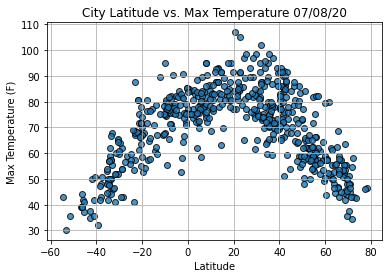

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

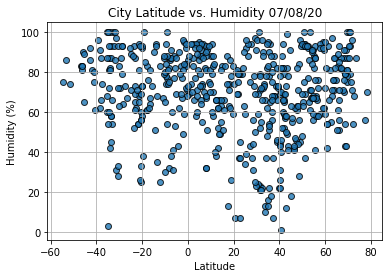

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

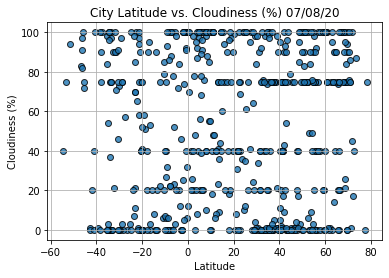

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

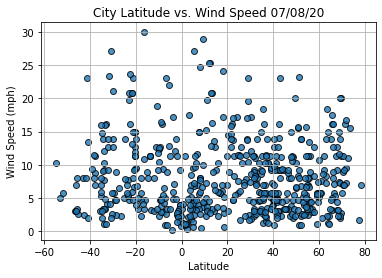

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Create the hemisphere dataframes.
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2020-07-08 19:13:21
Lat                         62.46
Lng                       -114.35
Max Temp                    62.01
Humidity                       55
Cloudiness                     75
Wind Speed                   9.17
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
556     True
557     True
558    False
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Grindavik,IS,2020-07-08 19:13:00,63.84,-22.43,48.20,76,75,14.99
6,Sibu,MY,2020-07-08 19:24:41,2.30,111.82,77.00,94,20,1.12
8,Tiksi,RU,2020-07-08 19:16:04,71.69,128.87,34.57,96,100,7.23
11,Adre,TD,2020-07-08 19:24:42,13.47,22.20,78.10,66,36,16.26
12,Abu Dhabi,AE,2020-07-08 19:24:42,24.47,54.37,96.80,63,10,5.82


In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

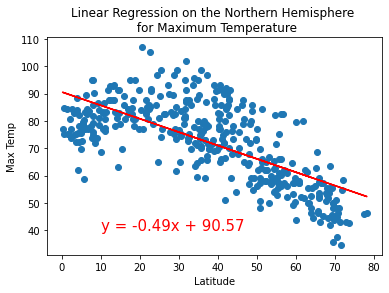

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

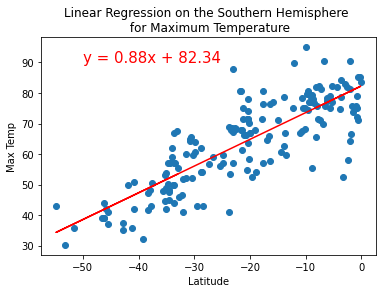

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

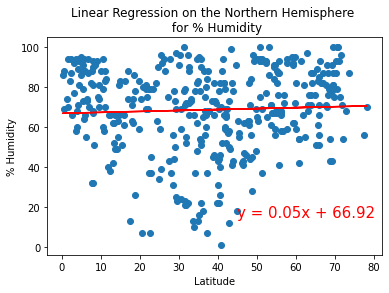

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

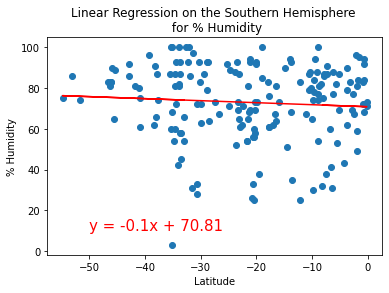

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

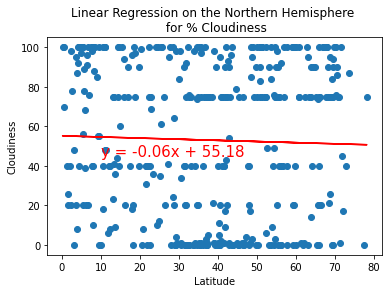

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(10,45))

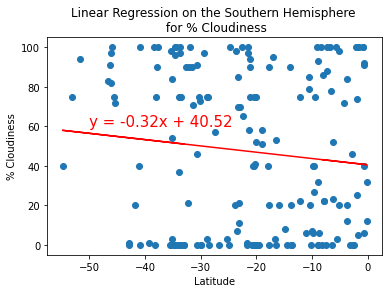

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

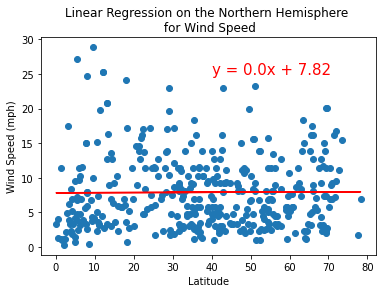

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,25))

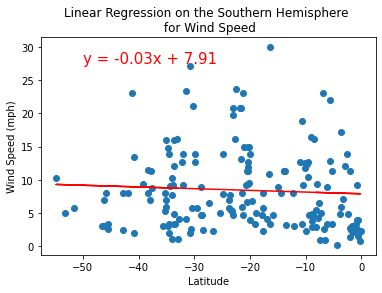

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,27.5))